<a href="https://colab.research.google.com/github/shailendrarg/Deep-learning/blob/master/Google_stock_prices_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [247]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
test_file="/content/drive/My Drive/Machine Learning/Stock prices/Google stock prices/Google_Stock_Price_Test.csv"
train_file="/content/drive/My Drive/Machine Learning/Stock prices/Google stock prices/Google_Stock_Price_Train.csv"

In [0]:
test_df=pd.read_csv(test_file)
train_df=pd.read_csv(train_file)

In [250]:
train_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [251]:
type(train_df["Date"][0])

str

In [252]:
train_df["Date"]=pd.to_datetime(train_df["Date"])
test_df["Date"]=pd.to_datetime(test_df["Date"])
type(train_df["Date"][0]),type(test_df["Date"][0])

(pandas._libs.tslibs.timestamps.Timestamp,
 pandas._libs.tslibs.timestamps.Timestamp)

In [253]:
train_df.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


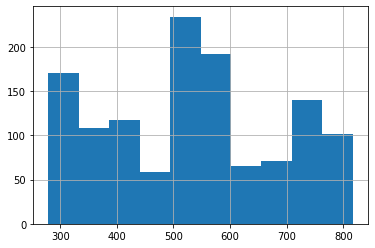

In [254]:
train_df["Open"].hist()

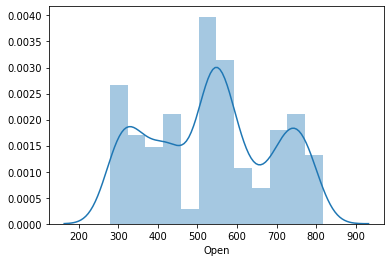

In [255]:
sns.distplot(train_df["Open"])

checking the distribution of Test data 

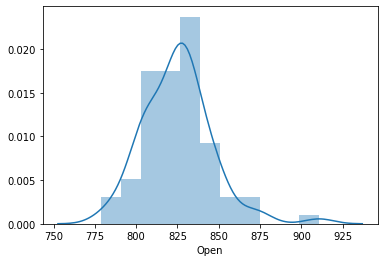

In [256]:
sns.distplot(test_df["Open"])

In [257]:
test_df["Open"].skew()

0.8764825740398502

Data Pre processing:Preparing the data for model. The model weare using is LSTM and we will be using a sequence of 60 ,it means that consecutive 59 open values of stock will be used as features to predict target open value which is 60th open value.

The LSTM or any deeeplearning model works best with scaled data . So we will be scaling the data using standard scaler.

In [258]:
train_data=train_df.Open.values
test_data=test_df.Open.values
train_data.shape,test_data.shape

((1258,), (81,))

In [0]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler(feature_range=(0,1))
train_open_values=mm.fit_transform(train_data.reshape(-1,1))
test_open_values=mm.fit_transform(test_data.reshape(-1,1))


In [260]:
train_open_values

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [261]:
test_open_values

array([[0.        ],
       [0.07243081],
       [0.05513843],
       [0.12476301],
       [0.20925298],
       [0.22032617],
       [0.19863485],
       [0.21486542],
       [0.21744411],
       [0.21441036],
       [0.2047782 ],
       [0.19954498],
       [0.21312101],
       [0.2156997 ],
       [0.32984459],
       [0.38536223],
       [0.44747829],
       [0.42396672],
       [0.27189994],
       [0.13689802],
       [0.15828591],
       [0.11368973],
       [0.18339018],
       [0.15843774],
       [0.19097456],
       [0.21380361],
       [0.23284047],
       [0.24945027],
       [0.28206301],
       [0.30481614],
       [0.3075464 ],
       [0.31186956],
       [0.33530549],
       [0.37808103],
       [0.37808103],
       [0.38915438],
       [0.37102761],
       [0.34690935],
       [0.35494876],
       [0.37952208],
       [0.41744397],
       [0.39249153],
       [0.36511204],
       [0.3685251 ],
       [0.41486554],
       [0.43375056],
       [0.48896505],
       [0.494

In [262]:
test_open_values.shape

(81, 1)

creating train and test data with features and target.

In [263]:
len(train_df.Open)

1258

In [0]:
X_train=[]
y_train=[]

for i in range(60,len(train_df.Open)):
  X_train.append(train_open_values[i-60:i])
  y_train.append(train_open_values[i])

In [265]:
X_train[2].shape

(60, 1)

In [0]:
X_test=[]
y_test=[]

for i in range(60,len(test_df.Open)):
  X_test.append(test_open_values[i-60:i])
  y_test.append(test_open_values[i])

The data in LSTM requires np array as inputs and needs to be reshaped as (shape[0],shape[1],1)


In [0]:
X_train=np.array(X_train)
y_train=np.array(y_train)

X_test=np.array(X_test)
y_test=np.array(y_test)

In [268]:
X_train[0].shape,X_test.shape

((60, 1), (21, 60, 1))

In [0]:
X_train_ls=X_train.reshape(-1,X_train[0].shape[0],1)
y_train_ls=y_train

X_test_ls=X_test.reshape(-1,X_test[0].shape[0],1)
y_test_ls=y_test

In [270]:
X_train_ls.shape,y_train_ls.shape  #shape of input data

((1198, 60, 1), (1198, 1))

In [271]:
X_test_ls.shape,y_test_ls.shape

((21, 60, 1), (21, 1))

Making LSTM model

In [0]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from keras.activations import relu
from keras.callbacks import EarlyStopping

In [0]:
model=Sequential()
model.add(LSTM(100,activation="relu",input_shape=(X_train_ls.shape[1],1),return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(100,activation="relu",return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(100,activation="relu",return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))

In [0]:
#es =EarlyStopping(monitor="val_loss",patience=5)

In [278]:
model.compile(optimizer="adam",loss="mse",metrics=["mse"])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 60, 100)           40800     
_________________________________________________________________
dropout_14 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 60, 100)           80400     
_________________________________________________________________
dropout_15 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_16 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)               

In [279]:
history=model.fit(X_train_ls,y_train_ls,batch_size=32,epochs=100,validation_split=0.2)

Train on 958 samples, validate on 240 samples
Epoch 1/100
958/958 [==============================] - 21s 22ms/step - loss: 0.0667 - mean_squared_error: 0.0667 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 2/100
958/958 [==============================] - 12s 13ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 3/100
958/958 [==============================] - 13s 13ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 4/100
958/958 [==============================] - 12s 13ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 5/100
958/958 [==============================] - 12s 13ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 6/100
958/958 [==============================] - 12s 13ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.00

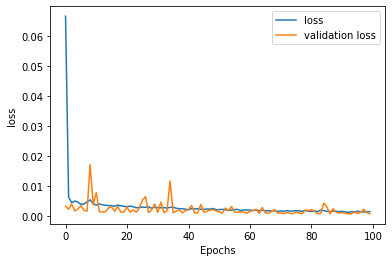

In [280]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["loss","validation loss"])
plt.show()

In [329]:
y_pred=model.predict([X_test_ls])
y_pred


array([[0.37939727],
       [0.3609863 ],
       [0.351957  ],
       [0.3526158 ],
       [0.36328244],
       [0.38330242],
       [0.40350625],
       [0.41446823],
       [0.4146923 ],
       [0.40722984],
       [0.3949703 ],
       [0.38072127],
       [0.36694384],
       [0.36101723],
       [0.3711395 ],
       [0.39427316],
       [0.42446697],
       [0.46049076],
       [0.5051533 ],
       [0.558236  ],
       [0.61180663]], dtype=float32)

In [331]:
stock_price=mm.inverse_transform(y_pred)
stock_price

array([[828.83356],
       [826.406  ],
       [825.2155 ],
       [825.30237],
       [826.70874],
       [829.3484 ],
       [832.0123 ],
       [833.45764],
       [833.4872 ],
       [832.50323],
       [830.88684],
       [829.00806],
       [827.1915 ],
       [826.4101 ],
       [827.74475],
       [830.7949 ],
       [834.776  ],
       [839.5257 ],
       [845.4144 ],
       [852.41345],
       [859.4767 ]], dtype=float32)

In [320]:
actual_stock_price=mm.inverse_transform(y_test_ls)
actual_stock_price

array([[833.5     ],
       [828.969971],
       [829.219971],
       [831.359985],
       [835.51001 ],
       [832.400024],
       [827.960022],
       [825.390015],
       [824.710022],
       [821.929993],
       [822.140015],
       [825.01001 ],
       [834.219971],
       [839.789978],
       [841.440002],
       [842.880005],
       [851.200012],
       [865.      ],
       [874.22998 ],
       [873.599976],
       [910.659973]])

In [332]:
actual_stock_price.shape

(21, 1)

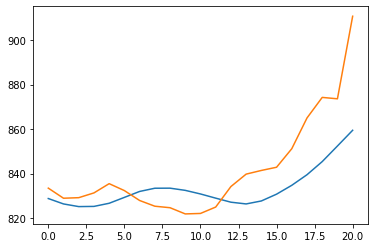

In [333]:
plt.plot(stock_price)
plt.plot(actual_stock_price)

Model is saved in a pickle file to be used in future.

In [0]:
import pickle
pickle.dump(model,open("googlestock.pkl","wb"))

In [0]:
predicted_price=[]
actual_price=[]
for i in range(len(actual_stock_price)):
  predicted_price.append(stock_price[i])
  actual_price.append(actual_stock_price[i])
#Google_prices["stock_price"]=stock_price

In [335]:
predicted_price

[array([828.83356], dtype=float32),
 array([826.406], dtype=float32),
 array([825.2155], dtype=float32),
 array([825.30237], dtype=float32),
 array([826.70874], dtype=float32),
 array([829.3484], dtype=float32),
 array([832.0123], dtype=float32),
 array([833.45764], dtype=float32),
 array([833.4872], dtype=float32),
 array([832.50323], dtype=float32),
 array([830.88684], dtype=float32),
 array([829.00806], dtype=float32),
 array([827.1915], dtype=float32),
 array([826.4101], dtype=float32),
 array([827.74475], dtype=float32),
 array([830.7949], dtype=float32),
 array([834.776], dtype=float32),
 array([839.5257], dtype=float32),
 array([845.4144], dtype=float32),
 array([852.41345], dtype=float32),
 array([859.4767], dtype=float32)]

In [0]:
Google_prices=pd.DataFrame()
Google_prices["actual_price"]=actual_price
Google_prices["predicted_price"]=predicted_price

In [339]:
Google_prices.head(30)

,actual_price,predicted_price
0,[833.5],[828.83356]
1,[828.969971],[826.406]
2,[829.219971],[825.2155]
3,[831.3599849999999],[825.30237]
4,[835.51001],[826.70874]
5,[832.400024],[829.3484]
6,[827.960022],[832.0123]
7,[825.3900150000001],[833.45764]
8,[824.710022],[833.4872]
9,[821.929993],[832.50323]
